In [7]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
from ellipse import LsqEllipse
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from skimage import io
import matplotlib.pyplot as plt
import math
import pickle
import statistics
from statistics import mean
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks


from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit
from matplotlib import pyplot
import pickle

In [8]:
import speckle
from speckle.inference.read_in_data import *
from speckle.inference.correlation_heatmap import *
from speckle.inference.calculating_tau import *
from speckle.inference.dedrift import *

In [62]:
def compute_g2t_wo_kernel(px,laglist_g2t):
    intensity=[]
    for t in range(0,img.shape[0],1):
        intensity.append(img[t][px[0],px[1]])
        
    g2t=[]
    for lag in laglist_g2t:
        numerator_sum=0
        denumerator_sum_1=0
        denumerator_sum_2=0
        max_t_range=500
        for t in range(0,max_t_range,1):
            numerator_sum=numerator_sum+int(intensity[t])*int(intensity[t+lag])
            denumerator_sum_1=denumerator_sum_1+int(intensity[t])
            denumerator_sum_2=denumerator_sum_2+int(intensity[t+lag])
        numerator=numerator_sum/max_t_range
        denumerator_1=denumerator_sum_1/max_t_range
        denumerator_2=denumerator_sum_2/max_t_range
        g2t.append((numerator/denumerator_1/denumerator_2)-1)
    return g2t

In [10]:
#expected D
kb=1.380649*10**(-23) # J*K^(-1)
T=300 # K
eta=0.5178838335180554 # Pa*S
r=50*10**(-9) # m
D=kb*T/(6*math.pi*eta*r) #m^2/s
print(D) #m^2/s

8.485961476425247e-15


# 0.05% 100 nm 10x objective 0.67 au

In [51]:
video_time_length=60 #s
imgname='0p05percentwt_100nm_inglycerol_1min_0p67au_10x_obj_50umdepth_15magnification'
foldername='/Volumes/wwyyrx/Wenyun/20220718/analysis/'

In [52]:
# read the image stack
img = io.imread(foldername+imgname+'.tif')
frame_number=img.shape[0]
img_height=img.shape[1]
img_width=img.shape[2]
framespeed=video_time_length/frame_number

In [63]:
laglist_g2t=range(0,1000,1)
averaged_g2t=[]
for y in range(21,24,1):
    for x in range(24,27,1):
        px=[y,x]
        g2t=compute_g2t_wo_kernel(px,laglist_g2t)
        averaged_g2t.append(g2t)

In [64]:
average_g2t=np.mean(averaged_g2t,axis=0)
pickle.dump(average_g2t, open(foldername+imgname+'_g2tcorrrelation_avg.p',"wb"))

In [65]:
average_g2t=pickle.load(open(foldername+imgname+'_g2tcorrrelation_avg.p', "rb"))
laglist_g2t=range(0,len(average_g2t),1)
lagtime_g2t= [element * framespeed for element in laglist_g2t]

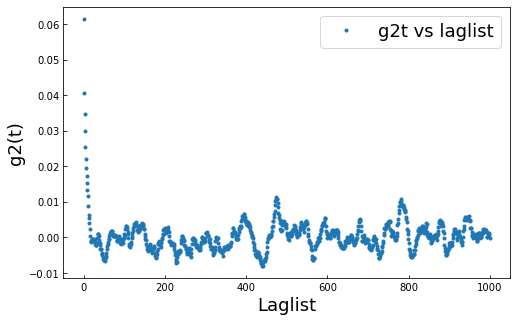

In [66]:
plt.figure(figsize=(8,5))
plt.plot(laglist_g2t,average_g2t,'.')
plt.legend(['g2t vs laglist'], fontsize=18)
plt.xlabel("Laglist",fontsize=18)
plt.ylabel("g2(t)",fontsize=18)
plt.tick_params(direction='in')

tau is: 0.03597518406659204
y = -27.79694 * x + -3.19746


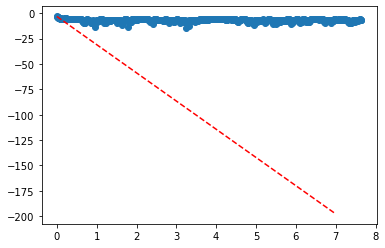

R square is 0.9967423217903871


In [28]:
lagtime_g2t= [element * framespeed for element in laglist_g2t]
plateau=np.mean(average_g2t[100:200])
tau, a, b=fit_exponential_decay_rsq(plateau,np.array(average_g2t),lagtime_g2t,1,8, True)

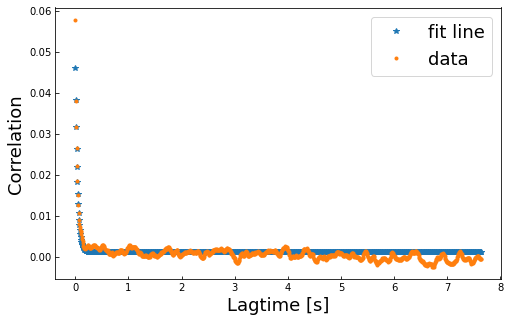

In [18]:
reconstruct(lagtime_g2t[0:1000],plateau,np.array(average_g2t[0:1000]),a,b)

In [21]:
n=1.47
angle=180
lamda=405 #nm
k=2*math.pi/lamda
q=2*k*math.sin(math.radians(angle/2))*10**(9)*n
D=a/(-2*q**2)
print(D)

6.066182062313808e-15


# 0.05% 100 nm 10x objective 1 au

In [25]:
video_time_length=60 #s
imgname='0p05percentwt_100nm_inglycerol_1min_1au_10x_obj_50umdepth_15magnification'
foldername='/Volumes/wwyyrx/Wenyun/20220718/analysis/'

In [26]:
# read the image stack
img = io.imread(foldername+imgname+'.tif')
frame_number=img.shape[0]
img_height=img.shape[1]
img_width=img.shape[2]
framespeed=video_time_length/frame_number

laglist_g2t=range(0,1000,1)
averaged_g2t=[]
for y in range(10,30,1):
    for x in range(100,150,1):
        px=[y,x]
        g2t=compute_g2t_wo_kernel(px,laglist_g2t)
        averaged_g2t.append(g2t)

average_g2t=np.mean(averaged_g2t,axis=0)
pickle.dump(average_g2t, open(foldername+imgname+'_g2tcorrrelation_avg.p',"wb"))

In [27]:
average_g2t=pickle.load(open(foldername+imgname+'_g2tcorrrelation_avg.p', "rb"))
laglist_g2t=range(0,len(average_g2t),1)
lagtime_g2t= [element * framespeed for element in laglist_g2t]

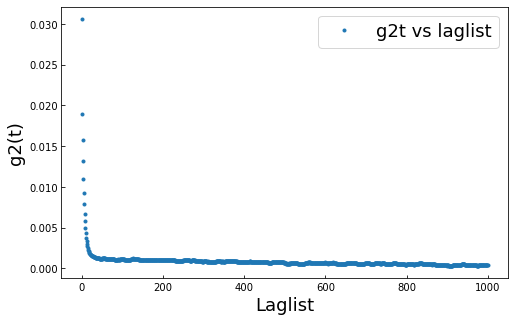

In [28]:
plt.figure(figsize=(8,5))
plt.plot(laglist_g2t,average_g2t,'.')
plt.legend(['g2t vs laglist'], fontsize=18)
plt.xlabel("Laglist",fontsize=18)
plt.ylabel("g2(t)",fontsize=18)
plt.tick_params(direction='in')

tau is: 0.039619026653836945
y = -25.24040 * x + -3.83457


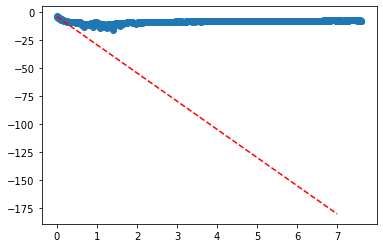

R square is 0.9998786165480998


In [29]:
lagtime_g2t= [element * framespeed for element in laglist_g2t]
plateau=np.mean(average_g2t[100:200])
tau, a, b=fit_exponential_decay_rsq(plateau,np.array(average_g2t),lagtime_g2t,1,8, True)

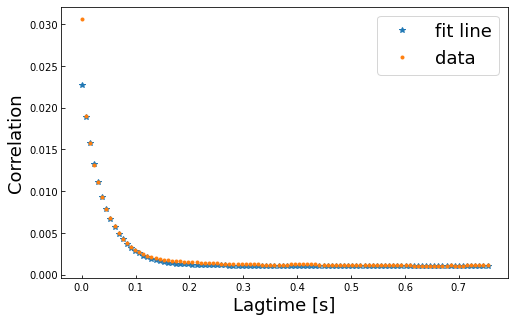

In [30]:
reconstruct(lagtime_g2t[0:100],plateau,np.array(average_g2t[0:100]),a,b)

In [31]:
n=1.47
angle=120
lamda=405 #nm
k=2*math.pi/lamda
q=2*k*math.sin(math.radians(angle/2))*10**(9)*n
D=a/(-2*q**2)
print(D)

8.088362147815826e-15


In [22]:
#expected D
kb=1.380649*10**(-23) # J*K^(-1)
T=300 # K
eta=0.46 # Pa*S
r=56*10**(-9) # m
D=kb*T/(6*math.pi*eta*r) #m^2/s
print(D) #m^2/s

8.530167431090148e-15


# 0.05% 100 nm 10x objective 2.02 au

In [23]:
video_time_length=60 #s
imgname='0p05percentwt_100nm_inglycerol_1min_2p02au_10x_obj_50umdepth_15magnification'
foldername='/Volumes/wwyyrx/Wenyun/20220718/analysis/'

In [24]:
# read the image stack
img = io.imread(foldername+imgname+'.tif')
frame_number=img.shape[0]
img_height=img.shape[1]
img_width=img.shape[2]
framespeed=video_time_length/frame_number

In [25]:
print(framespeed)

0.007652085193215151


laglist_g2t=range(0,1000,1)
averaged_g2t=[]
for y in range(10,30,1):
    for x in range(100,150,1):
        px=[y,x]
        g2t=compute_g2t_wo_kernel(px,laglist_g2t)
        averaged_g2t.append(g2t)

average_g2t=np.mean(averaged_g2t,axis=0)
pickle.dump(average_g2t, open(foldername+imgname+'_g2tcorrrelation_avg.p',"wb"))

In [26]:
average_g2t=pickle.load(open(foldername+imgname+'_g2tcorrrelation_avg.p', "rb"))
laglist_g2t=range(0,len(average_g2t),1)
lagtime_g2t= [element * framespeed for element in laglist_g2t]

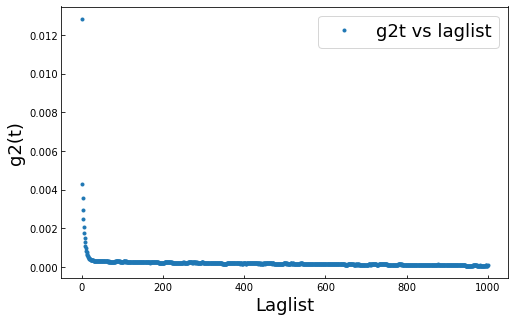

In [27]:
plt.figure(figsize=(8,5))
plt.plot(laglist_g2t,average_g2t,'.')
plt.legend(['g2t vs laglist'], fontsize=18)
plt.xlabel("Laglist",fontsize=18)
plt.ylabel("g2(t)",fontsize=18)
plt.tick_params(direction='in')

tau is: 0.038603532290576774
y = -25.90437 * x + -5.31800


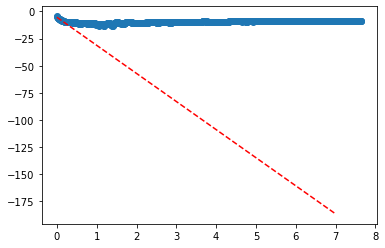

R square is 0.9999547707093783


In [28]:
lagtime_g2t= [element * framespeed for element in laglist_g2t]
plateau=np.mean(average_g2t[100:200])
tau, a, b=fit_exponential_decay_rsq(plateau,np.array(average_g2t),lagtime_g2t,1,8, True)

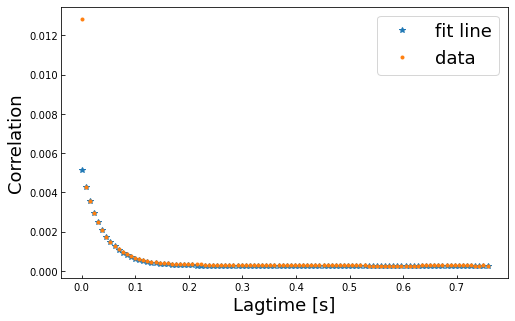

In [29]:
reconstruct(lagtime_g2t[0:100],plateau,np.array(average_g2t[0:100]),a,b)

In [30]:
n=1.47
angle=180
lamda=405 #nm
k=2*math.pi/lamda
q=2*k*math.sin(math.radians(angle/2))*10**(9)*n
D=a/(-2*q**2)
print(D)

6.225849355728992e-15


# 0.05% 100 nm 20x objective 0.79 au

In [31]:
video_time_length=60 #s
imgname='0p05percentwt_100nm_inglycerol_1min_0p79au_20x_obj_60umdepth_15magnification'
foldername='/Volumes/wwyyrx/Wenyun/20220718/analysis/'

In [32]:
# read the image stack
img = io.imread(foldername+imgname+'.tif')
frame_number=img.shape[0]
img_height=img.shape[1]
img_width=img.shape[2]
framespeed=video_time_length/frame_number

In [33]:
print(framespeed)

0.0076511094108645756


laglist_g2t=range(0,1000,1)
averaged_g2t=[]
for y in range(10,30,1):
    for x in range(100,150,1):
        px=[y,x]
        g2t=compute_g2t_wo_kernel(px,laglist_g2t)
        averaged_g2t.append(g2t)

average_g2t=np.mean(averaged_g2t,axis=0)
pickle.dump(average_g2t, open(foldername+imgname+'_g2tcorrrelation_avg.p',"wb"))

In [34]:
average_g2t=pickle.load(open(foldername+imgname+'_g2tcorrrelation_avg.p', "rb"))
laglist_g2t=range(0,len(average_g2t),1)
lagtime_g2t= [element * framespeed for element in laglist_g2t]

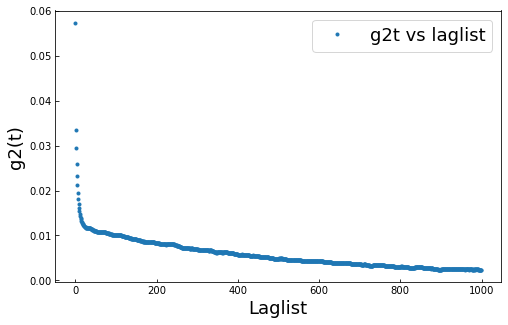

In [35]:
plt.figure(figsize=(8,5))
plt.plot(laglist_g2t,average_g2t,'.')
plt.legend(['g2t vs laglist'], fontsize=18)
plt.xlabel("Laglist",fontsize=18)
plt.ylabel("g2(t)",fontsize=18)
plt.tick_params(direction='in')

tau is: 0.03628296642739439
y = -27.56114 * x + -3.61514


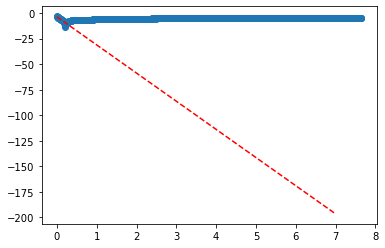

R square is 0.999981736561028


In [36]:
lagtime_g2t= [element * framespeed for element in laglist_g2t]
plateau=np.mean(average_g2t[20:40])
tau, a, b=fit_exponential_decay_rsq(plateau,np.array(average_g2t),lagtime_g2t,1,5, True)

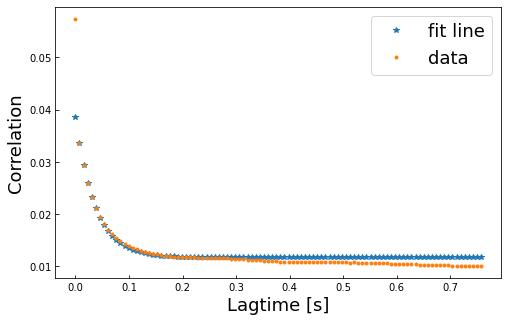

In [37]:
reconstruct(lagtime_g2t[0:100],plateau,np.array(average_g2t[0:100]),a,b)

In [38]:
n=1.47
angle=180
lamda=405 #nm
k=2*math.pi/lamda
q=2*k*math.sin(math.radians(angle/2))*10**(9)*n
D=a/(-2*q**2)
print(D)

6.624038779218703e-15


tau is: 2.679179998044325
y = -0.37325 * x + -4.60777


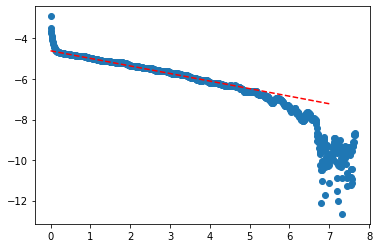

R square is 0.967717590740171


In [39]:
lagtime_g2t= [element * framespeed for element in laglist_g2t]
plateau=np.mean(average_g2t[900:1000])
tau, a, b=fit_exponential_decay_rsq(plateau,np.array(average_g2t),lagtime_g2t,20,100, True)

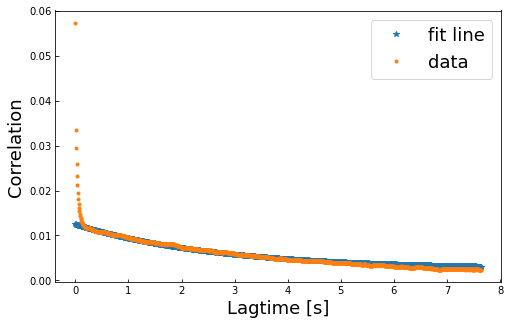

In [40]:
reconstruct(lagtime_g2t[0:1000],plateau,np.array(average_g2t[0:1000]),a,b)

In [41]:
a=308.8*10**(-9) #m
D=a*a/tau/4
print(D)

8.898006112841096e-15


# 0.05% 100 nm 20x objective 1 au

In [42]:
video_time_length=60 #s
imgname='0p05percentwt_100nm_inglycerol_1min_1au_20x_obj_60umdepth_15magnification'
foldername='/Volumes/wwyyrx/Wenyun/20220718/analysis/'

In [43]:
# read the image stack
img = io.imread(foldername+imgname+'.tif')
frame_number=img.shape[0]
img_height=img.shape[1]
img_width=img.shape[2]
framespeed=video_time_length/frame_number

In [44]:
print(framespeed)

0.007606490872210953


laglist_g2t=range(0,1000,1)
averaged_g2t=[]
for y in range(10,30,1):
    for x in range(100,150,1):
        px=[y,x]
        g2t=compute_g2t_wo_kernel(px,laglist_g2t)
        averaged_g2t.append(g2t)

average_g2t=np.mean(averaged_g2t,axis=0)
pickle.dump(average_g2t, open(foldername+imgname+'_g2tcorrrelation_avg.p',"wb"))

In [45]:
average_g2t=pickle.load(open(foldername+imgname+'_g2tcorrrelation_avg.p', "rb"))
laglist_g2t=range(0,len(average_g2t),1)
lagtime_g2t= [element * framespeed for element in laglist_g2t]

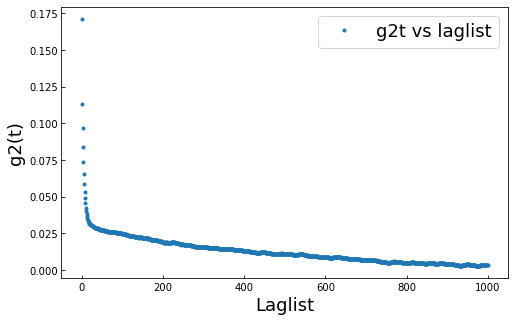

In [46]:
plt.figure(figsize=(8,5))
plt.plot(laglist_g2t,average_g2t,'.')
plt.legend(['g2t vs laglist'], fontsize=18)
plt.xlabel("Laglist",fontsize=18)
plt.ylabel("g2(t)",fontsize=18)
plt.tick_params(direction='in')

tau is: 0.0353852189288159
y = -28.26039 * x + -2.28098


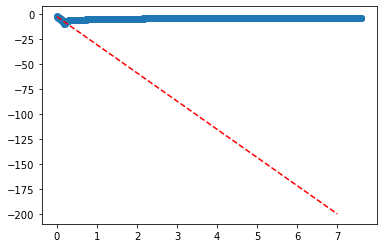

R square is 0.9999897995168837


In [48]:
lagtime_g2t= [element * framespeed for element in laglist_g2t]
plateau=np.mean(average_g2t[20:30])
tau, a, b=fit_exponential_decay_rsq(plateau,np.array(average_g2t),lagtime_g2t,1,4, True)

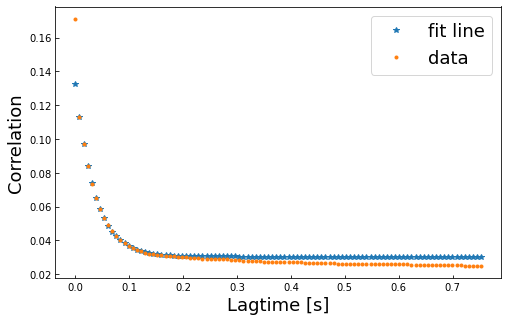

In [49]:
reconstruct(lagtime_g2t[0:100],plateau,np.array(average_g2t[0:100]),a,b)

In [50]:
n=1.47
angle=120
lamda=405 #nm
k=2*math.pi/lamda
q=2*k*math.sin(math.radians(angle/2))*10**(9)*n
D=a/(-2*q**2)
print(D)

9.056126971119021e-15


tau is: 2.7325078462569348
y = -0.36596 * x + -3.57956


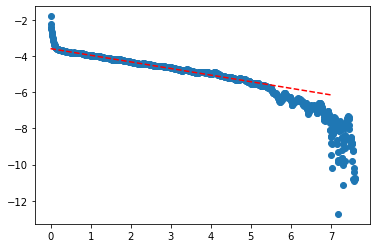

R square is 0.988641358010859


In [56]:
lagtime_g2t= [element * framespeed for element in laglist_g2t]
plateau=np.mean(average_g2t[900:1000])
tau, a, b=fit_exponential_decay_rsq(plateau,np.array(average_g2t),lagtime_g2t,20,200, True)

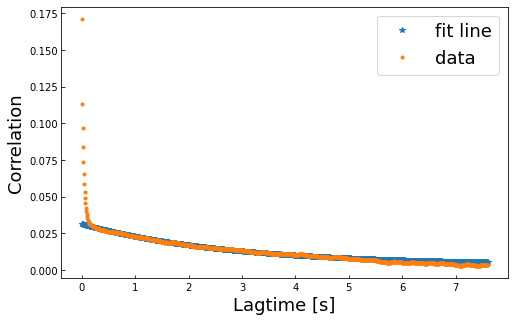

In [57]:
reconstruct(lagtime_g2t[0:1000],plateau,np.array(average_g2t[0:1000]),a,b)

In [58]:
a=308.8*10**(-9) #m
D=a*a/tau/4
print(D)

8.724351892586811e-15


# 0.05% 100 nm 20x objective 2.03 au

In [59]:
video_time_length=60 #s
imgname='0p05percentwt_100nm_inglycerol_1min_2p03au_20x_obj_60umdepth_15magnification'
foldername='/Volumes/wwyyrx/Wenyun/20220718/analysis/'

In [60]:
# read the image stack
img = io.imread(foldername+imgname+'.tif')
frame_number=img.shape[0]
img_height=img.shape[1]
img_width=img.shape[2]
framespeed=video_time_length/frame_number

laglist_g2t=range(0,1000,1)
averaged_g2t=[]
for y in range(10,30,1):
    for x in range(100,150,1):
        px=[y,x]
        g2t=compute_g2t_wo_kernel(px,laglist_g2t)
        averaged_g2t.append(g2t)

average_g2t=np.mean(averaged_g2t,axis=0)
pickle.dump(average_g2t, open(foldername+imgname+'_g2tcorrrelation_avg.p',"wb"))

In [61]:
average_g2t=pickle.load(open(foldername+imgname+'_g2tcorrrelation_avg.p', "rb"))
laglist_g2t=range(0,len(average_g2t),1)
lagtime_g2t= [element * framespeed for element in laglist_g2t]

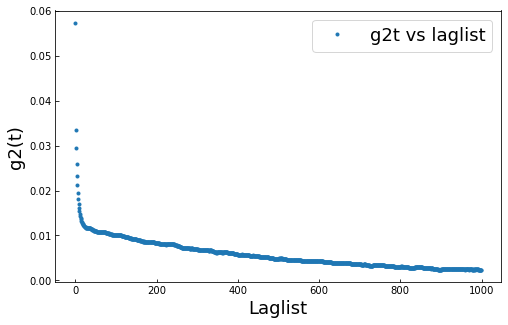

In [62]:
plt.figure(figsize=(8,5))
plt.plot(laglist_g2t,average_g2t,'.')
plt.legend(['g2t vs laglist'], fontsize=18)
plt.xlabel("Laglist",fontsize=18)
plt.ylabel("g2(t)",fontsize=18)
plt.tick_params(direction='in')

tau is: 0.03664050772107095
y = -27.29220 * x + -3.63032


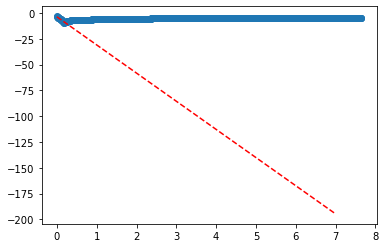

R square is 0.9998416152702686


In [64]:
lagtime_g2t= [element * framespeed for element in laglist_g2t]
plateau=np.mean(average_g2t[20:30])
tau, a, b=fit_exponential_decay_rsq(plateau,np.array(average_g2t),lagtime_g2t,1,8, True)

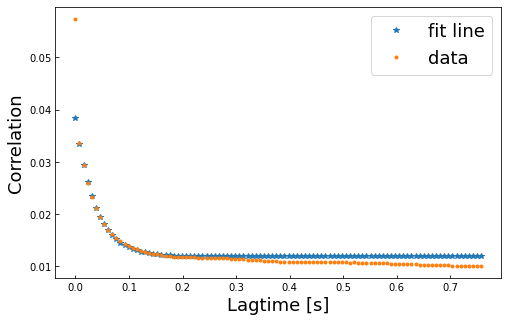

In [65]:
reconstruct(lagtime_g2t[0:100],plateau,np.array(average_g2t[0:100]),a,b)

In [66]:
n=1.47
angle=120
lamda=405 #nm
k=2*math.pi/lamda
q=2*k*math.sin(math.radians(angle/2))*10**(9)*n
D=a/(-2*q**2)
print(D)

8.745867769073443e-15


tau is: 2.8161514647329655
y = -0.35509 * x + -4.61216


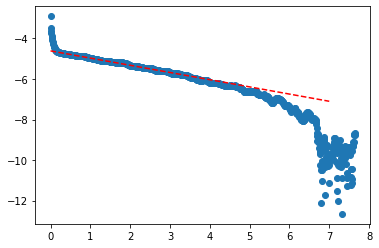

R square is 0.9884826875963546


In [68]:
lagtime_g2t= [element * framespeed for element in laglist_g2t]
plateau=np.mean(average_g2t[900:1000])
tau, a, b=fit_exponential_decay_rsq(plateau,np.array(average_g2t),lagtime_g2t,20,200, True)

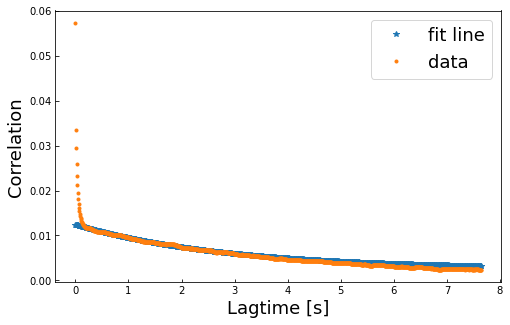

In [69]:
reconstruct(lagtime_g2t[0:1000],plateau,np.array(average_g2t[0:1000]),a,b)

In [70]:
a=308.8*10**(-9) #m
D=a*a/tau/4
print(D)

8.465226497417995e-15


# 0.05% 100 nm 40x water objective 0.63 au

In [39]:
video_time_length=60 #s
imgname='0p05percentwt_100nm_inglycerol_1min_0p63au_40xw_obj_60umdepth'
foldername='/Volumes/wwyyrx/Wenyun/20220718/analysis/'

In [40]:
# read the image stack
img = io.imread(foldername+imgname+'.tif')
frame_number=img.shape[0]
img_height=img.shape[1]
img_width=img.shape[2]
framespeed=video_time_length/frame_number

In [41]:
print(framespeed)

0.0136986301369863


In [42]:
laglist_g2t=range(0,1000,1)
averaged_g2t=[]
for y in range(10,13,1):
    for x in range(100,103,1):
        px=[y,x]
        g2t=compute_g2t_wo_kernel(px,laglist_g2t)
        averaged_g2t.append(g2t)

In [43]:
average_g2t=np.mean(averaged_g2t,axis=0)
pickle.dump(average_g2t, open(foldername+imgname+'_g2tcorrrelation_avg.p',"wb"))

In [44]:
average_g2t=pickle.load(open(foldername+imgname+'_g2tcorrrelation_avg.p', "rb"))
laglist_g2t=range(0,len(average_g2t),1)
lagtime_g2t= [element * framespeed for element in laglist_g2t]

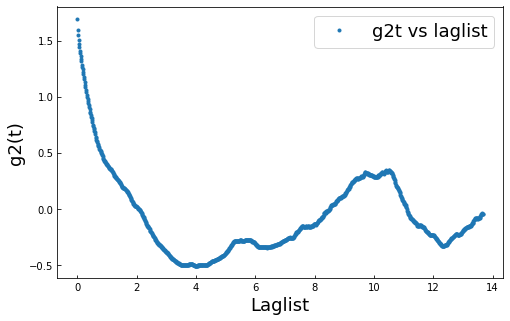

In [45]:
plt.figure(figsize=(8,5))
plt.plot(lagtime_g2t[0:1000],average_g2t[0:1000],'.')
plt.legend(['g2t vs laglist'], fontsize=18)
plt.xlabel("Laglist",fontsize=18)
plt.ylabel("g2(t)",fontsize=18)
plt.tick_params(direction='in')

tau is: 1.4226002453209021
y = -0.70294 * x + 0.37474


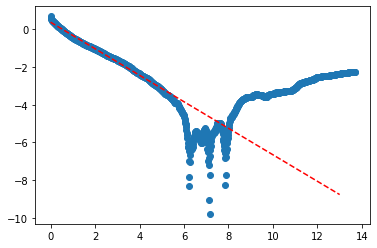

R square is 0.9933757325069765


In [76]:
lagtime_g2t= [element * framespeed for element in laglist_g2t]
plateau=np.mean(average_g2t[500:600])
tau, a, b=fit_exponential_decay_rsq(plateau,np.array(average_g2t),lagtime_g2t,1,400, True)

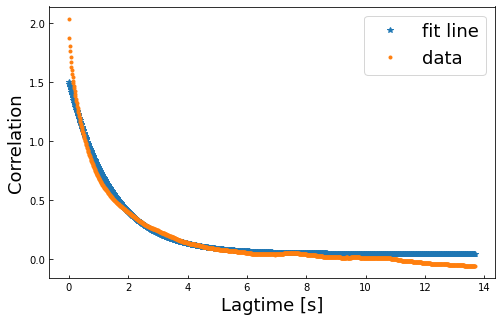

In [77]:
reconstruct(lagtime_g2t[0:1000],plateau,np.array(average_g2t[0:1000]),a,b)

In [78]:
a=224.59*10**(-9) #m
D=a*a/tau/4
print(D)

8.86416761593871e-15


# 0.05% 100 nm 40x water objective 1 au

In [79]:
video_time_length=60 #s
imgname='0p05percentwt_100nm_inglycerol_1min_1au_40xw_obj_60umdepth'
foldername='/Volumes/wwyyrx/Wenyun/20220718/analysis/'

In [80]:
# read the image stack
img = io.imread(foldername+imgname+'.tif')
frame_number=img.shape[0]
img_height=img.shape[1]
img_width=img.shape[2]
framespeed=video_time_length/frame_number

laglist_g2t=range(0,1000,1)
averaged_g2t=[]
for y in range(50,60,1):
    for x in range(100,150,1):
        px=[y,x]
        g2t=compute_g2t_wo_kernel(px,laglist_g2t)
        averaged_g2t.append(g2t)

average_g2t=np.mean(averaged_g2t,axis=0)
pickle.dump(average_g2t, open(foldername+imgname+'_g2tcorrrelation_avg.p',"wb"))

In [81]:
average_g2t=pickle.load(open(foldername+imgname+'_g2tcorrrelation_avg.p', "rb"))
laglist_g2t=range(0,len(average_g2t),1)
lagtime_g2t= [element * framespeed for element in laglist_g2t]

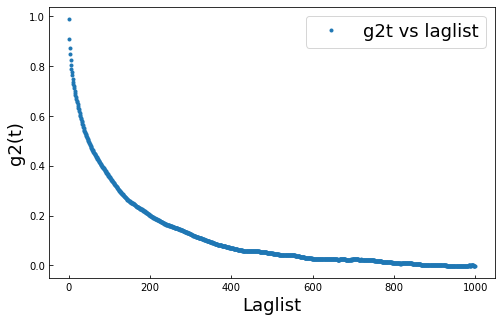

In [82]:
plt.figure(figsize=(8,5))
plt.plot(laglist_g2t,average_g2t,'.')
plt.legend(['g2t vs laglist'], fontsize=18)
plt.xlabel("Laglist",fontsize=18)
plt.ylabel("g2(t)",fontsize=18)
plt.tick_params(direction='in')

tau is: 2.1290010096901435
y = -0.46970 * x + -0.41434


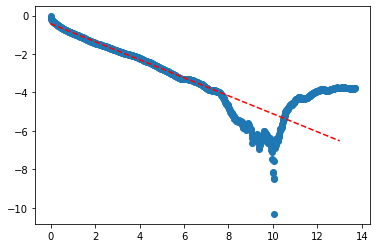

R square is 0.9854836945458398


In [83]:
lagtime_g2t= [element * framespeed for element in laglist_g2t]
plateau=np.mean(average_g2t[-500:-100])
tau, a, b=fit_exponential_decay_rsq(plateau,np.array(average_g2t),lagtime_g2t,0,300, True)

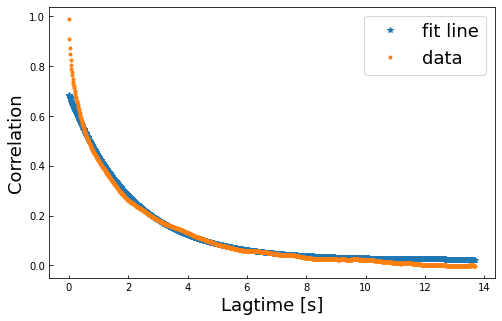

In [84]:
reconstruct(lagtime_g2t[0:1000],plateau,np.array(average_g2t[0:1000]),a,b)

In [85]:
a=224.5*10**(-9) #m
D=a*a/tau/4
print(D)

5.918298038681449e-15


# 0.05% 100 nm 40x water objective 1.77 au

In [5]:
video_time_length=60 #s
imgname='0p05percentwt_100nm_inglycerol_1min_1p77au_40xw_obj_60umdepth'
foldername='/Volumes/wwyyrx/Wenyun/20220718/analysis/'

In [6]:
# read the image stack
img = io.imread(foldername+imgname+'.tif')
frame_number=img.shape[0]
img_height=img.shape[1]
img_width=img.shape[2]
framespeed=video_time_length/frame_number

laglist_g2t=range(0,1000,1)
averaged_g2t=[]
for y in range(50,60,1):
    for x in range(100,150,1):
        px=[y,x]
        g2t=compute_g2t_wo_kernel(px,laglist_g2t)
        averaged_g2t.append(g2t)

average_g2t=np.mean(averaged_g2t,axis=0)
pickle.dump(average_g2t, open(foldername+imgname+'_g2tcorrrelation_avg.p',"wb"))

In [7]:
average_g2t=pickle.load(open(foldername+imgname+'_g2tcorrrelation_avg.p', "rb"))
laglist_g2t=range(0,len(average_g2t),1)
lagtime_g2t= [element * framespeed for element in laglist_g2t]

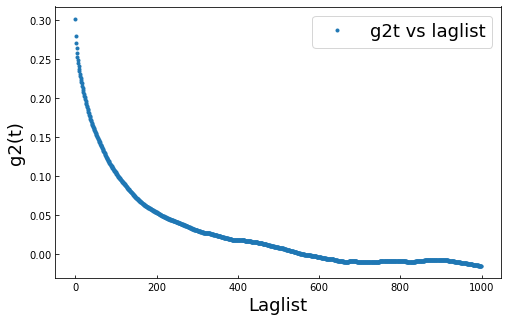

In [8]:
plt.figure(figsize=(8,5))
plt.plot(laglist_g2t,average_g2t,'.')
plt.legend(['g2t vs laglist'], fontsize=18)
plt.xlabel("Laglist",fontsize=18)
plt.ylabel("g2(t)",fontsize=18)
plt.tick_params(direction='in')

tau is: 2.0150883732027642
y = -0.49626 * x + -1.52346


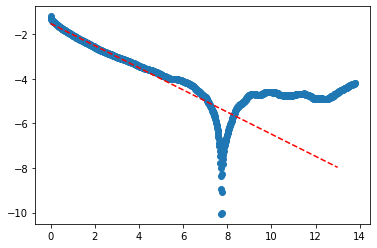

R square is 0.9865229713870124


In [9]:
lagtime_g2t= [element * framespeed for element in laglist_g2t]
plateau=0# np.mean(average_g2t[-500:-100])
tau, a, b=fit_exponential_decay_rsq(plateau,np.array(average_g2t),lagtime_g2t,0,300, True)

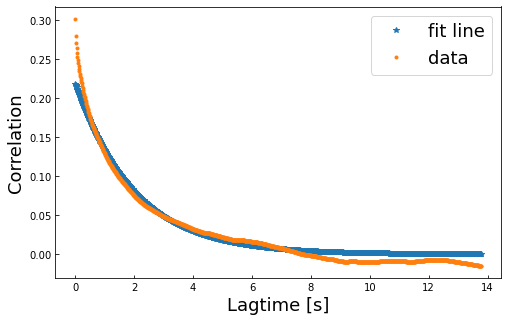

In [10]:
reconstruct(lagtime_g2t[0:1000],plateau,np.array(average_g2t[0:1000]),a,b)

In [11]:
area=224.5*10**(-9) #m
D=area*area/tau/4
print(D)

6.2528585185440624e-15


## 0.005% 100 nm 40x water objective 1 au

In [ ]:
video_time_length=60 #s
imgname='0p005percentwt_100nm_inglycerol_1min_1au_40xw_obj_50umdepth'
foldername='/Volumes/wwyyrx/Wenyun/20220718/analysis/'

In [ ]:
# read the image stack
img = io.imread(foldername+imgname+'.tif')
frame_number=img.shape[0]
img_height=img.shape[1]
img_width=img.shape[2]
framespeed=video_time_length/frame_number

In [ ]:
laglist_g2t=range(0,1000,1)
averaged_g2t=[]
for y in range(50,60,1):
    for x in range(100,150,1):
        px=[y,x]
        g2t=compute_g2t_wo_kernel(px,laglist_g2t)
        averaged_g2t.append(g2t)


In [ ]:
average_g2t=np.mean(averaged_g2t,axis=0)
pickle.dump(average_g2t, open(foldername+imgname+'_g2tcorrrelation_avg.p',"wb"))

In [ ]:
average_g2t=pickle.load(open(foldername+imgname+'_g2tcorrrelation_avg.p', "rb"))
laglist_g2t=range(0,len(average_g2t),1)
lagtime_g2t= [element * framespeed for element in laglist_g2t]

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(laglist_g2t,average_g2t,'.')
plt.legend(['g2t vs laglist'], fontsize=18)
plt.xlabel("Laglist",fontsize=18)
plt.ylabel("g2(t)",fontsize=18)
plt.tick_params(direction='in')

In [ ]:
lagtime_g2t= [element * framespeed for element in laglist_g2t]
plateau=0 #np.mean(g2t[-200:-1])
tau, a, b=fit_exponential_decay(plateau,np.array(average_g2t),lagtime_g2t,1,50, True)

In [ ]:
reconstruct(lagtime_g2t[0:1000],plateau,np.array(average_g2t[0:1000]),a,b)

In [ ]:
a=224.5*10**(-9) #m
D=a*a/tau/4
print(D)

In [ ]:
#expected D
kb=1.380649*10**(-23) # J*K^(-1)
T=300 # K
eta=0.616 # Pa*S
r=50*10**(-9) # m
D=kb*T/(6*math.pi*eta*r) #m^2/s
print(D) #m^2/s